In [1]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pred_accident = pd.read_csv('/content/drive/My Drive/AIT/Thesis/pred_accident.csv')

In [3]:
pred_accident.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,E09000020,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,E09000020,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,E09000020,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30


In [4]:
# Dataframe for casualty gender prediction
pred_accident_gender = pred_accident.drop(['Number_of_Vehicles', 'Local_Authority_(Highway)', 'Avg_Casualty_Age'], 
                              axis = 1).reset_index(drop = True)

In [5]:
pred_accident_gender.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,7,40
4,524630,179040,-0.206022,51.496572,1,2,1,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,7,30


In [6]:
pred_accident_gender['Casualty_Gender'].value_counts()

Majority Male      303957
Majority Female    185099
Both gender         40047
Name: Casualty_Gender, dtype: int64

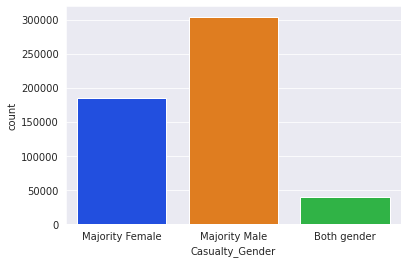

In [7]:
sns.set_style('darkgrid')
sns.set_palette('bright')
sns.countplot(x="Casualty_Gender", data=pred_accident_gender)

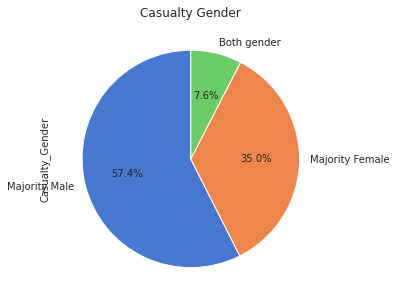

In [8]:
#Proportion of each casualty gender
sns.set_palette('muted')
pred_accident_gender['Casualty_Gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5),
                                              title = 'Casualty Gender')

**Original Data**

In [9]:
X = pred_accident_gender.drop(['Casualty_Gender'], axis = 1)
y = pred_accident_gender['Casualty_Gender']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
Counter(y_train)

Counter({'Both gender': 27941,
         'Majority Female': 129691,
         'Majority Male': 212740})

In [12]:
Counter(y_test)

Counter({'Both gender': 12106,
         'Majority Female': 55408,
         'Majority Male': 91217})

In [13]:
# Decision Tree model
model_DTree = DecisionTreeClassifier()
model_DTree = model_DTree.fit(X_train, y_train)

In [14]:
y_pred = model_DTree.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5204780414663802


In [16]:
print(confusion_matrix(y_test, y_pred))

[[ 5560  2939  3607]
 [ 2783 21760 30865]
 [ 3531 32390 55296]]


In [17]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Both gender       0.47      0.46      0.46     12106
Majority Female       0.38      0.39      0.39     55408
  Majority Male       0.62      0.61      0.61     91217

       accuracy                           0.52    158731
      macro avg       0.49      0.49      0.49    158731
   weighted avg       0.52      0.52      0.52    158731



In [18]:
# Random Forest model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred = rfc_model.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5843912027266256


In [21]:
print(confusion_matrix(y_test, y_pred))

[[ 7895  1294  2917]
 [ 3981 12044 39383]
 [ 4525 13870 72822]]


In [22]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Both gender       0.48      0.65      0.55     12106
Majority Female       0.44      0.22      0.29     55408
  Majority Male       0.63      0.80      0.71     91217

       accuracy                           0.58    158731
      macro avg       0.52      0.56      0.52    158731
   weighted avg       0.55      0.58      0.55    158731



In [23]:
# Naive Bayes model
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [24]:
y_pred = gnb.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5599725321455796


In [26]:
print(confusion_matrix(y_test, y_pred))

[[    3  1091 11012]
 [    7  5363 50038]
 [   10  7688 83519]]


In [27]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Both gender       0.15      0.00      0.00     12106
Majority Female       0.38      0.10      0.15     55408
  Majority Male       0.58      0.92      0.71     91217

       accuracy                           0.56    158731
      macro avg       0.37      0.34      0.29    158731
   weighted avg       0.48      0.56      0.46    158731



**Minority Class Oversampling using SMOTE**

In [28]:
# Oversampling the minority class in the data using SMOTE 
sm = SMOTE() 
X_over, y_over = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [30]:
Counter(y_train_over)

Counter({'Both gender': 212332,
         'Majority Female': 213384,
         'Majority Male': 212593})

In [31]:
Counter(y_test_over)

Counter({'Both gender': 91625,
         'Majority Female': 90573,
         'Majority Male': 91364})

In [42]:
# Decision Tree model
model_DTree_over = DecisionTreeClassifier()
model_DTree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_pred_over = model_DTree_over.predict(X_test_over)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test_over, y_pred_over))

Accuracy: 0.7061068423245919


In [45]:
print(confusion_matrix(y_test_over, y_pred_over))

[[83023  4855  3747]
 [ 4604 55153 30816]
 [ 3674 32702 54988]]


In [46]:
print(classification_report(y_test_over, y_pred_over))

                 precision    recall  f1-score   support

    Both gender       0.91      0.91      0.91     91625
Majority Female       0.59      0.61      0.60     90573
  Majority Male       0.61      0.60      0.61     91364

       accuracy                           0.71    273562
      macro avg       0.71      0.71      0.71    273562
   weighted avg       0.71      0.71      0.71    273562



In [37]:
# Random Forest model
rfc_over = RandomForestClassifier()
rfc_over.fit(X_train_over,y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred_over = rfc_over.predict(X_test_over)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test_over, y_pred_over))

Accuracy: 0.7535403308939107


In [40]:
print(confusion_matrix(y_test_over, y_pred_over))

[[89092   942  1591]
 [ 7373 47234 35966]
 [ 5632 15918 69814]]


In [41]:
print(classification_report(y_test_over, y_pred_over))

                 precision    recall  f1-score   support

    Both gender       0.87      0.97      0.92     91625
Majority Female       0.74      0.52      0.61     90573
  Majority Male       0.65      0.76      0.70     91364

       accuracy                           0.75    273562
      macro avg       0.75      0.75      0.74    273562
   weighted avg       0.75      0.75      0.74    273562



In [47]:
# Naive Bayes model
gnb_model_over = GaussianNB()
gnb_model_over.fit(X_train_over, y_train_over) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
y_pred_over = gnb_model_over.predict(X_test_over) 

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test_over, y_pred_over))

Accuracy: 0.4193601450493855


In [50]:
print(confusion_matrix(y_test_over, y_pred_over))

[[61257 16837 13531]
 [44263 26641 19669]
 [39877 24664 26823]]


In [51]:
print(classification_report(y_test_over, y_pred_over))

                 precision    recall  f1-score   support

    Both gender       0.42      0.67      0.52     91625
Majority Female       0.39      0.29      0.34     90573
  Majority Male       0.45      0.29      0.35     91364

       accuracy                           0.42    273562
      macro avg       0.42      0.42      0.40    273562
   weighted avg       0.42      0.42      0.40    273562



**Majority Class Undersampling using RandomUnderSampler**

In [52]:
# Undersampling the majority class in the data using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [53]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

In [54]:
Counter(y_train_under)

Counter({'Both gender': 27981,
         'Majority Female': 27997,
         'Majority Male': 28120})

In [55]:
Counter(y_test_under)

Counter({'Both gender': 12066,
         'Majority Female': 12050,
         'Majority Male': 11927})

In [56]:
#Decision Tree model
model_DTree_under = DecisionTreeClassifier()
model_DTree_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
y_pred_under = model_DTree_under.predict(X_test_under)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))

Accuracy: 0.587603695585828


In [59]:
print(confusion_matrix(y_test_under, y_pred_under))

[[9592 1399 1075]
 [1048 5658 5344]
 [ 895 5103 5929]]


In [60]:
print(classification_report(y_test_under, y_pred_under))

                 precision    recall  f1-score   support

    Both gender       0.83      0.79      0.81     12066
Majority Female       0.47      0.47      0.47     12050
  Majority Male       0.48      0.50      0.49     11927

       accuracy                           0.59     36043
      macro avg       0.59      0.59      0.59     36043
   weighted avg       0.59      0.59      0.59     36043



In [61]:
# Random Forest model
rfc_under = RandomForestClassifier()
rfc_under.fit(X_train_under,y_train_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred_under = rfc_under.predict(X_test_under)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))

Accuracy: 0.6599894570374275


In [64]:
print(confusion_matrix(y_test_under, y_pred_under))

[[11998    46    22]
 [ 1362  5880  4808]
 [ 1124  4893  5910]]


In [65]:
print(classification_report(y_test_under, y_pred_under))

                 precision    recall  f1-score   support

    Both gender       0.83      0.99      0.90     12066
Majority Female       0.54      0.49      0.51     12050
  Majority Male       0.55      0.50      0.52     11927

       accuracy                           0.66     36043
      macro avg       0.64      0.66      0.65     36043
   weighted avg       0.64      0.66      0.65     36043



In [66]:
#Naive Bayes model
gnb_model_under = GaussianNB()
gnb_model_under.fit(X_train_under, y_train_under) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_pred_under = gnb_model_under.predict(X_test_under)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))

Accuracy: 0.4023804899703132


In [69]:
print(confusion_matrix(y_test_under, y_pred_under))

[[5102 3524 3440]
 [3426 4425 4199]
 [3254 3697 4976]]


In [70]:
print(classification_report(y_test_under, y_pred_under))

                 precision    recall  f1-score   support

    Both gender       0.43      0.42      0.43     12066
Majority Female       0.38      0.37      0.37     12050
  Majority Male       0.39      0.42      0.41     11927

       accuracy                           0.40     36043
      macro avg       0.40      0.40      0.40     36043
   weighted avg       0.40      0.40      0.40     36043

